# 6.4 Supervised Machine Learning - Regression 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data cleaning
#### 3. Scatterplot to explore data visually
#### 4. Hypothesis
#### 5. NumPy arrays
#### 6. Split data into two sets: a training set and a test set.
#### 7. Linear Regression
#### 8. Plot showing regression line
#### 9. MSE and R2 score

### 1. Import data and libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [2]:
# Importing data

# Define path

path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts'

In [3]:
# Import Paris green spaces data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'espaces_verts_75_updated.csv'))

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Name,Type,Category,Street Number,Street Number Suffix,Street Type,Street Name,...,Perimeter,Year opened,Year renovated,Former name,Year name changed,Number of entities,Open 24hrs,Geo Shape,URL_PLAN,Area category
0,0,0,11255.0,JARDINIERES DU 39 QUAI DE LA SEINE,Décorations sur la voie publique,Jardiniere,39.0,NaN,QUAI DE LA,SEINE,...,30.737389,2011.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.3733184661747395, 48.886...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
1,1,1,10804.0,JARDINIERES DU PARVIS DE LA PLACE RAOUL DAUTRY,Décorations sur la voie publique,Jardiniere,6.0,S,PLACE,RAOUL DAUTRY,...,312.718568,NaN,NaN,NaN,NaN,4.0,NaN,"{""coordinates"": [[[[2.3216385869638, 48.841417...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Large size
2,2,2,10937.0,JARDINIERES ANGLE DES RUES DE TOLBIAC - BAUDRI...,Décorations sur la voie publique,Jardiniere,47.0,NaN,RUE,BAUDRICOURT,...,80.353023,2005.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.363882470474931, 48.8265...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
3,3,3,219.0,JARDIN FRANCOISE GIROUD,Promenades ouvertes,Jardin,4.0,V,PLACE D,ITALIE,...,245.468867,1878.0,2019.0,SQUARE DE LA PLACE D'ITALIE,2013.0,1.0,Oui,"{""coordinates"": [[[2.356129760906164, 48.83152...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Very large size
4,4,4,10303.0,JARDINIERE DE LA PLACE FRANZ LISZT,Décorations sur la voie publique,Jardiniere,2.0,BIS V,PLACE,FRANZ LISTZ,...,52.677758,NaN,NaN,NaN,NaN,1.0,NaN,"{""coordinates"": [[[2.351449405515269, 48.87773...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size


In [5]:
df.shape

(2286, 25)

### 2. Data cleaning

In [6]:
# Remove Unnamed columns

df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [7]:
df.columns

Index(['ID', 'Name', 'Type', 'Category', 'Street Number',
       'Street Number Suffix', 'Street Type', 'Street Name', 'Zip code',
       'Calculated area', 'Actual total area', 'Horticultural area',
       'Enclosure', 'Perimeter', 'Year opened', 'Year renovated',
       'Former name', 'Year name changed', 'Number of entities', 'Open 24hrs',
       'Geo Shape', 'URL_PLAN', 'Area category'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2223 non-null   float64
 1   Name                  2286 non-null   object 
 2   Type                  2285 non-null   object 
 3   Category              2286 non-null   object 
 4   Street Number         2284 non-null   float64
 5   Street Number Suffix  365 non-null    object 
 6   Street Type           2039 non-null   object 
 7   Street Name           2036 non-null   object 
 8   Zip code              2286 non-null   float64
 9   Calculated area       1975 non-null   float64
 10  Actual total area     1738 non-null   float64
 11  Horticultural area    1693 non-null   float64
 12  Enclosure             2237 non-null   object 
 13  Perimeter             1717 non-null   float64
 14  Year opened           1560 non-null   float64
 15  Year renovated       

In [9]:
# Check missing values in the Paris green spaces cleaned dataset
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display the percentage of missing values for each column
missing_percentage.sort_values(ascending=False)

Year renovated          95.756780
Year name changed       87.620297
Street Number Suffix    84.033246
Former name             77.909011
Open 24hrs              62.948381
Year opened             31.758530
Horticultural area      25.940507
Perimeter               24.890639
Actual total area       23.972003
Area category           23.972003
Calculated area         13.604549
Street Name             10.936133
Street Type             10.804899
Number of entities       3.412073
URL_PLAN                 2.755906
ID                       2.755906
Enclosure                2.143482
Street Number            0.087489
Geo Shape                0.087489
Type                     0.043745
Name                     0.000000
Zip code                 0.000000
Category                 0.000000
dtype: float64

#### Zip code = none missing
##### Calculated area = 13.6% missing 
#### Actual total area = 24% missing 
#### Horticultural area = 26% missing

    Cross check if missing Calculated and Actual total areas overlap?

In [10]:
# Check for missing values in the Calculated area and Actual total area columns
missing_actual = df['Actual total area'].isnull()
missing_calculated = df['Calculated area'].isnull()

# Find the overlap where both are missing
overlap_missing = missing_actual & missing_calculated

# Count the number of overlapping missing values
num_overlap_missing = overlap_missing.sum()

print(f"Number of overlapping missing values: {num_overlap_missing}")


Number of overlapping missing values: 105


In [11]:
# Check for missing values in the Calculated + Actual + Horticultural area columns
missing_actual = df['Actual total area'].isnull()
missing_calculated = df['Calculated area'].isnull()
missing_horticultural = df['Horticultural area'].isnull()

# Find the overlap where both are missing
overlap_missing = missing_actual & missing_calculated & missing_horticultural

# Count the number of overlapping missing values
num_overlap_missing = overlap_missing.sum()

print(f"Number of overlapping missing values: {num_overlap_missing}")


Number of overlapping missing values: 105


In [12]:
# Check missing values for Calculated area

print(df['Calculated area'].isnull().sum())

311


In [13]:
df['Calculated area'].describe()

count    1.975000e+03
mean     1.266710e+04
std      2.770511e+05
min      0.000000e+00
25%      9.200000e+01
50%      4.800000e+02
75%      2.106500e+03
max      9.284926e+06
Name: Calculated area, dtype: float64

#### Max Calculated area value corresponds with the size of Bois de Vincennes (Paris' largest park).

In [14]:
df['Actual total area'].describe()

count      1738.000000
mean       3891.250288
std       19587.202995
min           0.000000
25%          92.000000
50%         365.500000
75%        1925.000000
max      432000.000000
Name: Actual total area, dtype: float64

#### 25% 1st quartile Actual matches Calculated area.
#### Actual total area max is too small (5% of size compared to max Calculated area --> does not include Bois de Vincennes).

In [15]:
# Check number of missing values for Actual total area

print(df['Actual total area'].isnull().sum())

548


#### Actual total area
    missing more values (548)
    max 432,000
    could be helpful in painting a more granular picture since extreme outliers not included
#### Calculated area
    missing fewer values (311)
    max 9,284,926
    extreme outliers such as the Bois de Vincennes are present
#### Overlapping missing values?
    105

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_44163/2182803067.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Actual total area'], bins=125)


<Axes: xlabel='Actual total area', ylabel='Density'>

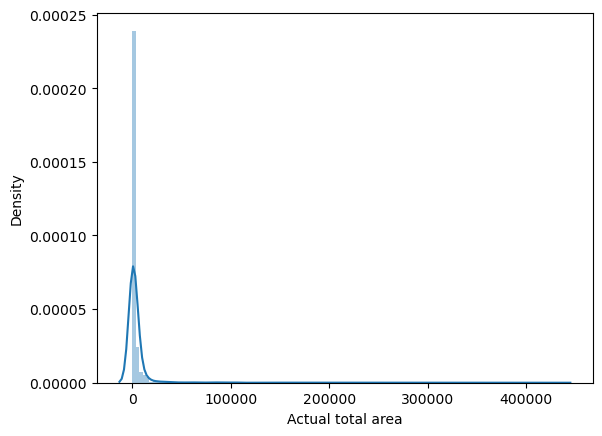

In [34]:
# Actual total area extreme values check
sns.distplot(df['Actual total area'], bins=125)

/var/folders/vr/wfz6rp895dv8r1w0bh88q2vh0000gn/T/ipykernel_44163/2671033717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calculated area'], bins=125) # Shows extreme values


<Axes: xlabel='Calculated area', ylabel='Density'>

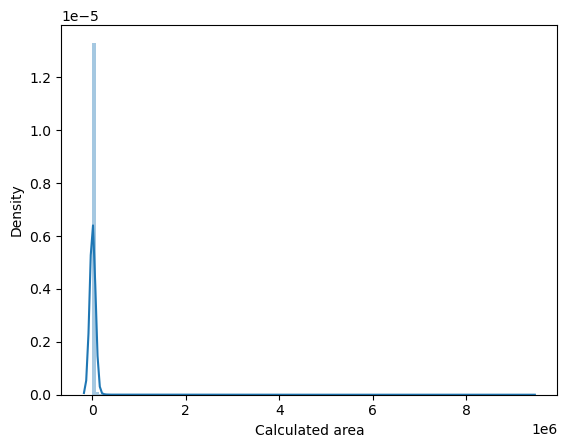

In [33]:
# Calculated area extreme values check
sns.distplot(df['Calculated area'], bins=125)

In [16]:
# Creating a new dataset with missing values in Actual total area column removed
df_cleaned1 = df.dropna(subset=['Actual total area'])

In [17]:
print(df_cleaned1['Actual total area'].isnull().sum())

0


### 3. Scatterplot to explore data visually

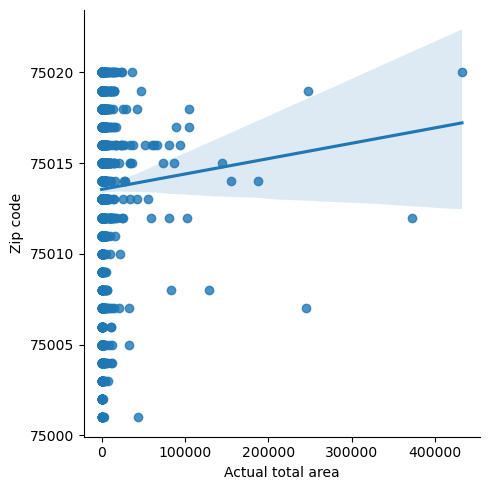

In [18]:
# Create a scatterplot for the "Zip code" and "Actual total area" columns in seaborn

sns.lmplot(x = 'Actual total area', y = 'Zip code', data = df_cleaned1)

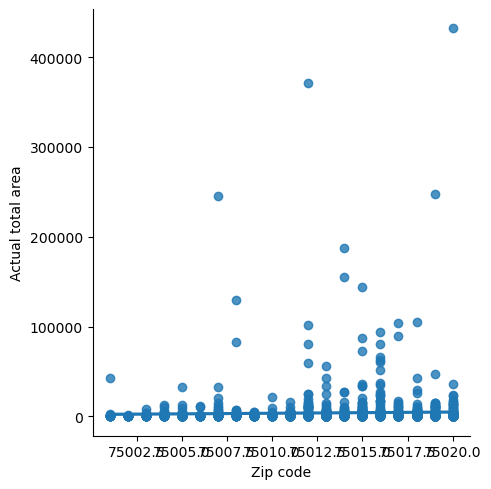

In [19]:
# Scatterplot switching x and y axes "Actual total area" and "Zip code"

sns.lmplot(x = 'Zip code', y = 'Actual total area', data = df_cleaned1)

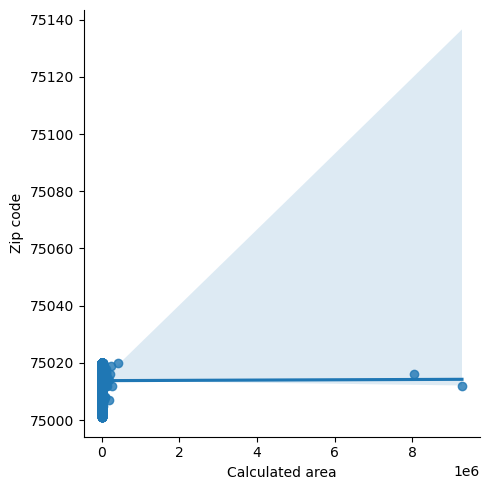

In [20]:
# Create a scatterplot for the "Zip code" and "Calculated area" 

sns.lmplot(x = 'Calculated area', y = 'Zip code', data = df)

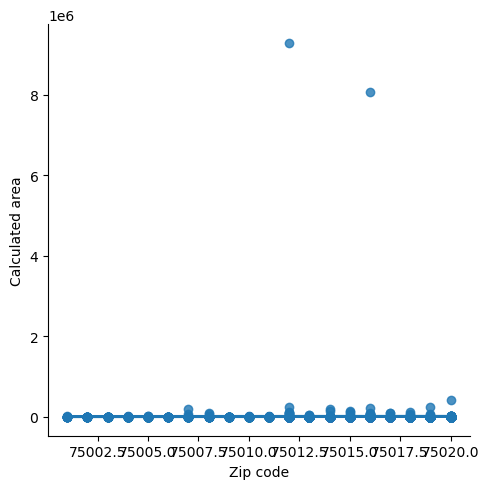

In [21]:
# Switching x and y axes 

sns.lmplot(x = 'Zip code', y = 'Calculated area', data = df)

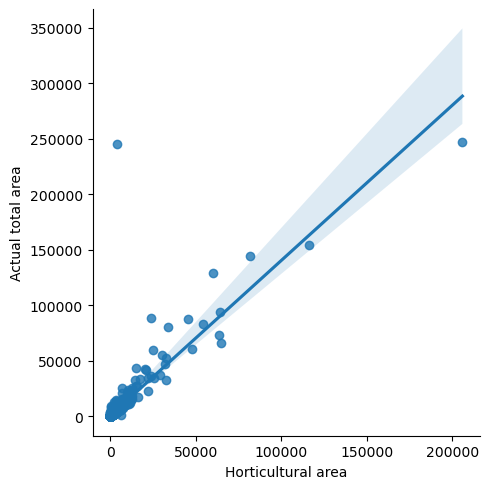

In [22]:
# Create a scatterplot for "Horticultural area" and "Actual total area" 

sns.lmplot(x = 'Horticultural area', y = 'Actual total area', data = df)

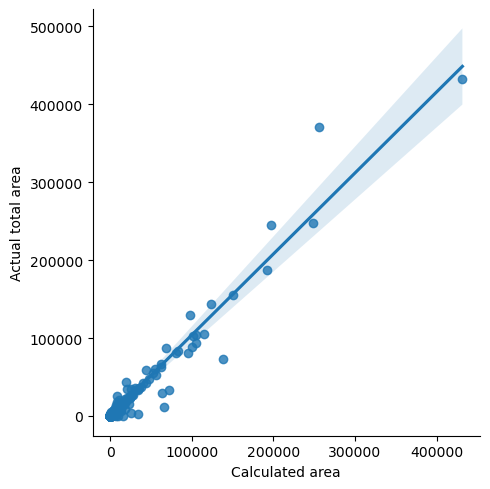

In [23]:
# Create a scatterplot for "Calculated area" and "Actual total area" 

sns.lmplot(x = 'Calculated area', y = 'Actual total area', data = df)

### 4. Hypothesis

#### a) More numerous and larger green spaces are found in the higher-numbered zip codes within Paris.
    Paris neighborhoods are shaped like a nautilus, starting from the center (75001) and circling out.
    Central neighborhoods tend to be geographically smaller and more dense with small historic streets.
    Outer neighborhoods are geographically larger and tend to be more modern (newer, wider streets).
    What is the ratio or percentage of green space compared to total geographic area within each zip code?
    And how does this compare to population (number of inhabitants) within each zip code?
#### b) Paris green spaces are predominantly comprised of horticultural area.
    Horticultural and total areas are a near match for small to medium sized green spaces. 
    For the largest green spaces, as total area increases Horticultural area decreases.
#### c) Calculated green space area closely matches the Actual total green space area.

### 5. NumPy arrays

In [24]:
# Reshape the variables into numpy arrays and put them into separate objects

X = df_cleaned1['Zip code'].values.reshape(-1,1)
y = df_cleaned1['Actual total area'].values.reshape(-1,1)

In [25]:
X

array([[75019.],
       [75015.],
       [75013.],
       ...,
       [75012.],
       [75020.],
       [75020.]])

In [26]:
y

array([[  20.],
       [1100.],
       [  56.],
       ...,
       [ 458.],
       [ 130.],
       [ 194.]])

### 6. Split data into two sets

In [27]:
# Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7. Linear Regression

In [28]:
# Create a regression object

regression = LinearRegression() # this is the regression object we will fit on the training set

In [29]:
# Fit the regression to the train set

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

### 8. Plot showing regression line

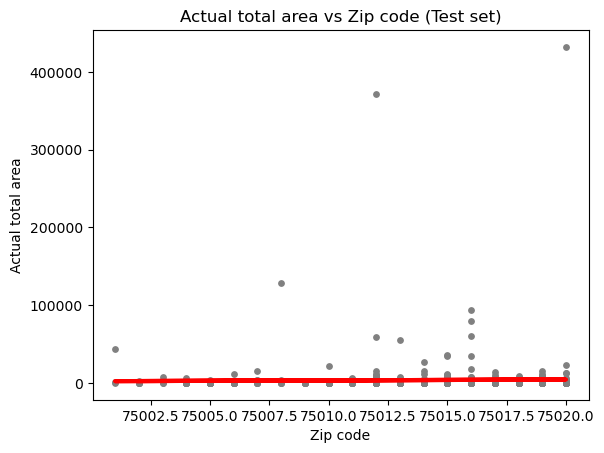

In [35]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Actual total area vs Zip code (Test set)')
plot_test.xlabel('Zip code')
plot_test.ylabel('Actual total area')
plot_test.show()

#### Here we have a straight line. Aside from a few notable outliers, it seems we can throw out the hypothesis that Paris green space size increases with higher numbered zip codes.

### 9. MSE and R2 score

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[109.58271291]]
Mean squared error:  707097767.9531056
R2 score:  0.00014593175933375058


In [38]:
y_predicted

array([[2388.75945409],
       [2717.50759281],
       [3813.33472186],
       [4032.50014767],
       [2827.09030571],
       [3922.91743477],
       [4142.08286058],
       [2717.50759281],
       [2607.9248799 ],
       [3484.58658314],
       [3484.58658314],
       [3484.58658314],
       [4032.50014767],
       [2717.50759281],
       [3484.58658314],
       [2607.9248799 ],
       [3594.16929605],
       [3265.42115733],
       [3375.00387024],
       [4361.24828639],
       [3922.91743477],
       [3375.00387024],
       [3155.83844443],
       [4251.66557348],
       [4032.50014767],
       [4142.08286058],
       [3922.91743477],
       [3594.16929605],
       [2827.09030571],
       [3594.16929605],
       [2498.34216699],
       [3922.91743477],
       [3813.33472186],
       [4361.24828639],
       [2936.67301862],
       [3813.33472186],
       [3813.33472186],
       [3265.42115733],
       [4032.50014767],
       [3484.58658314],
       [3265.42115733],
       [2936.673

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32.0,2388.759454
1,581.0,2717.507593
2,6020.0,3813.334722
3,1048.0,4032.500148
4,30.0,2827.090306
5,1252.0,3922.917435
6,560.0,4142.082861
7,16.0,2717.507593
8,1410.0,2607.924880
9,450.0,3484.586583


##### Compare how the regression fits the training set

In [40]:
# Predict

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[109.58271291]]
Mean squared error:  243974009.82942984
R2 score:  0.0012302565395376774


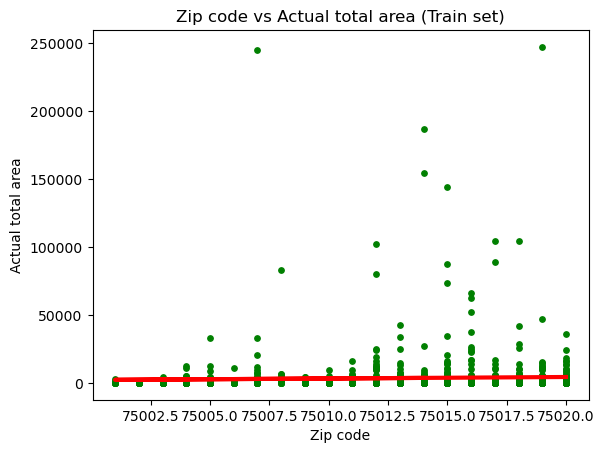

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Zip code vs Actual total area (Train set)')
plot_test.xlabel('Zip code')
plot_test.ylabel('Actual total area')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [55]:
# Clean the extreme values from the "Actual total area" variable observed during the consistency checks.

df_test = df_cleaned1[df_cleaned1['Actual total area'] <=5000] 

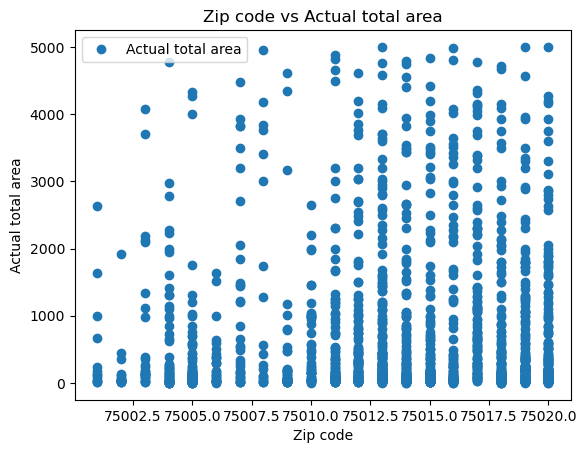

In [56]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Zip code', y='Actual total area', style='o')  
plt.title('Zip code vs Actual total area')  
plt.xlabel('Zip code')  
plt.ylabel('Actual total area')  
plt.show()

In [57]:
# Reshape again.

X_2 = df_test['Zip code'].values.reshape(-1,1)
y_2 = df_test['Actual total area'].values.reshape(-1,1)

In [58]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [59]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [60]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [61]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [62]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[20.21095129]]
Mean squared error:  1161665.3510820977
R2 score:  -0.0001323595660107646


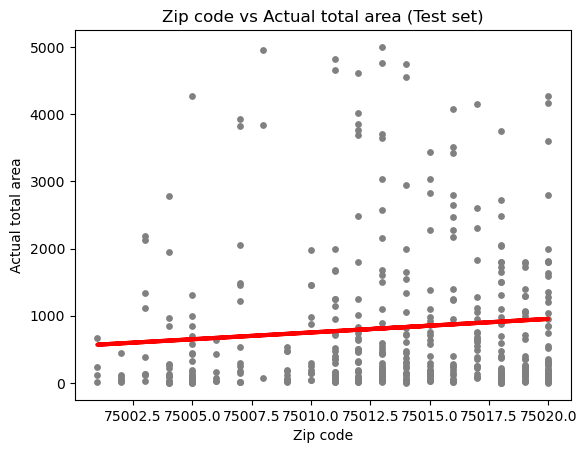

In [63]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Zip code vs Actual total area (Test set)')
plot_test.xlabel('Zip code')
plot_test.ylabel('Actual total area')
plot_test.show()

In [64]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,190.0,851.762566
1,473.0,791.129712
2,63.0,770.918761
3,174.0,952.817323
4,1255.0,791.129712
5,1100.0,912.395420
6,180.0,912.395420
7,969.0,629.442102
8,400.0,871.973517
9,6.0,629.442102


### This dataset has too few observations (it does not have the recommended 5,000+ observations to conduct a predictive analysis).
### Removing extreme values may have forced the model to perform better, and does not necessarily reflect reliable results.
### Maybe the nautilus shape of Paris (with zip codes starting in the center and increasing as it spirals out) is not the best fit for this particular model due to its non-linear nature.